In [26]:
pip install tensorflow==1.15.2

     |████████████████████████████████| 110.5MB 93kB/s 
     |████████████████████████████████| 3.8MB 47.3MB/s 
     |████████████████████████████████| 512kB 52.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=e9cffd3ff3fdc982e10d94064164fa02c9d49284f0899534ea5f65d3fe6c6632
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-gpu 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow-gpu 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import img_to_array,array_to_img,load_img
from keras.models import Sequential
from keras.layers import Dense,Dropout,MaxPooling2D,Conv2D,Flatten,Activation
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import os
import cv2

Using TensorFlow backend.


In [5]:
categories=['benign','malignant']

In [6]:
train_dir="/content/drive/My Drive/Skin Cancer Malignant vs Benign/train/"
test_dir="/content/drive/My Drive/Skin Cancer Malignant vs Benign/test/"

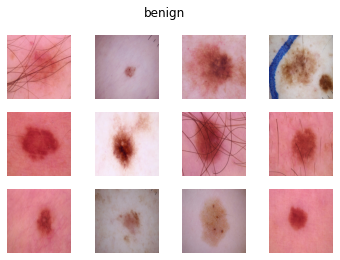

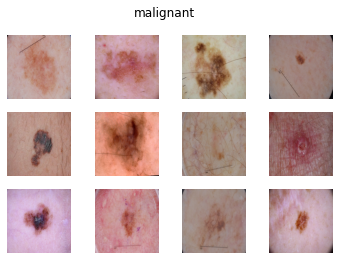

In [ ]:
for category in categories:
  fig, _=plt.subplots(3,4)
  fig.suptitle(category)
  for k, v in enumerate(os.listdir(train_dir+category) [:12]):
    img=plt.imread(train_dir+category+'/'+v)
    plt.subplot(3,4,k+1)
    plt.axis("off")
    plt.imshow(img)
  plt.show()

In [ ]:
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
 
 
LR = 1e-5
height=55
width=33
channels=3
seed=1337
batch_size = 64 #Number of images to load at each iteration
num_classes = 2
epochs = 50
data_augmentation = True
num_predictions = 20
 
# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
 
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    )
 
# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical'                                                 
                                                  )
 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical',
                                                  )
 
train_num = train_generator.samples
validation_num = validation_generator.samples


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(height, width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc', 'Precision', 'Recall'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        9280      
_________________________________________________________________
activation_1 (Activation)    (None, 37, 37, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 128)       7

In [ ]:
filepath=str(os.getcwd()+"/Skin_Cancer_Noraml_Model_Train1.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint]#, stopper]

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1
                             )

Epoch 1/30
41/41 [==============================] - ETA: 0s - loss: 0.6026 - acc: 0.6615 - precision: 0.6615 - recall: 0.6615 
Epoch 00001: val_acc improved from -inf to 0.79844, saving model to /content/Skin_Cancer_Noraml_Model_Train1.h5f
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/Skin_Cancer_Noraml_Model_Train1.h5f/assets
41/41 [==============================] - 973s 24s/step - loss: 0.6026 - acc: 0.6615 - precision: 0.6615 - recall: 0.6615 - val_loss: 0.4394 - val_acc: 0.7984 - val_precision: 0.7984 - val_recall: 0.7984
Epoch 2/30
41/41 [==============================] - ETA: 0s - loss: 0.4908 - acc: 0.7695 - precision: 0.7695 - recall: 0.7695
Epoch 00002: val_acc did not improve from 0.79844
41/41 [==============================] - 63s 2s/step - loss:

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics 
%matplotlib inline
model_trained = load_model(filepath)
# Predict the values from the validation dataset
Y_pred = model_trained.predict_generator(validation_generator, validation_num // batch_size+1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(validation_generator.classes,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true = validation_generator.classes,y_pred = Y_pred_classes)
# plot the confusion matrix
confusion_mtx

Instructions for updating:
Please use Model.predict, which supports generators.


array([[296,  64],
       [ 30, 270]])

In [ ]:
print(metrics.classification_report(validation_generator.classes, Y_pred_classes))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86       360
           1       0.81      0.90      0.85       300

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



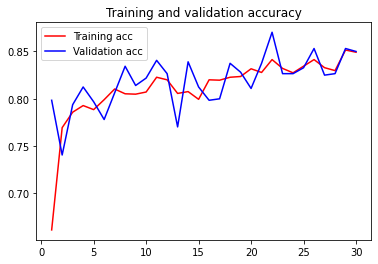

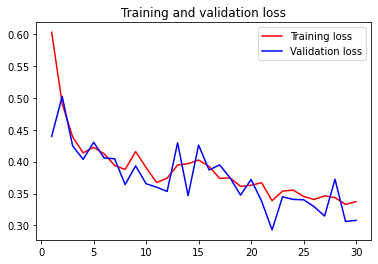

In [ ]:
#Plot Training and validation accuracy and Training and validation loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
#import library 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
from keras.applications import vgg16
model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(width, height, 3), pooling="max")

for layer in model.layers[:-5]: #freeze all layers except the last ten
        layer.trainable = False
#Check the trainable status of the individual layers        
for layer in model.layers:
    print(layer, layer.trainable)

58892288/58889256 [==============================] - 1s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7faf7d41f780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7bb2a438> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7bb2a860> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faf7bb2ac18> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7badb828> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7baf8358> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faf7baf8780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7baf92e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7baf9e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faf7b283588> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7faf7b283518> Fals

In [ ]:
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 33, 55, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 33, 55, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 33, 55, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 27, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 27, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 27, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 13, 128)        0     

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential

# Although this part can be done also with the functional API, I found that for this simple models, this becomes more intuitive
transfer_model = Sequential()
for layer in model.layers:
    transfer_model.add(layer)
transfer_model.add(Dense(1024, activation="relu"))  # Very important to use relu as activation function, search for "vanishing gradiends" :)
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(2, activation="softmax")) # Finally our activation layer! we use 10 outputs as we have 3 covid case(covid normal varial pnemoniea ) (labels)


In [ ]:
from keras import optimizers
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)

transfer_model.compile(loss="categorical_crossentropy",
                      optimizer=adam,
                      metrics=["accuracy"])

In [ ]:
learning_rate = 5e-5

checkpoint = ModelCheckpoint("Skin_Cancer_VGG1.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

In [ ]:
model_history = transfer_model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=20,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                             callbacks=[checkpoint], 
                              verbose = 1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
41/41 [==============================] - ETA: 0s - loss: 0.5623 - acc: 0.7097 
Epoch 00001: val_acc improved from -inf to 0.81250, saving model to Skin_Cancer_VGG1.h5
41/41 [==============================] - 1004s 24s/step - loss: 0.5623 - acc: 0.7097 - val_loss: 0.4251 - val_acc: 0.8125
Epoch 2/20
41/41 [==============================] - ETA: 0s - loss: 0.4367 - acc: 0.7905
Epoch 00002: val_acc did not improve from 0.81250
41/41 [==============================] - 116s 3s/step - loss: 0.4367 - acc: 0.7905 - val_loss: 0.4068 - val_acc: 0.8000
Epoch 3/20
41/41 [==============================] - ETA: 0s - loss: 0.4087 - acc: 0.8068
Epoch 00003: val_acc improved from 0.81250 to 0.82969, saving model to Skin_Cancer_VGG1.h5
41/41 [==============================] - 114s 3s/step - loss: 0.4087 - acc: 0.8068 - val_loss: 0.3416 - val_acc: 0.8297
Epoch 4/20
41/41 [==============================] - ETA: 0s - los

In [ ]:
path='/content/drive/My Drive/Covid_model_save/VGG16Model_Skin_Cancer.h5'
model.save(path)

In [ ]:
Y_pred = transfer_model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 84.1% 


In [ ]:
print(metrics.classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       360
           1       0.84      0.86      0.85       300

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660

